## <p style="text-align: right;"> &#9989; Abhijit Allu</p>

# CMSE 202 Final (Section 002 - Spring 2024) (90 points total)

The goal of this final is to give you the opportunity to test out some of the skills that you've developed having now finished CMSE 202. In particular, you'll be committing and pushing repository changes to a GitHub repository, working with data to build a network graph, performing regression analysis, and classifying data using a machine learning classifier. You should find that you have all of the skills necessary to complete this exam having completed the second half of CMSE 202!

You are encouraged to look through the entire exam before you get started so that you can appropriately budget your time and understand the broad goals of the exam. Once you've read through it, you'll probably want to make sure you do Part 1 first to ensure that your GitHub repository is working correctly. Let your instructor know right away if you run into issues!

The exam is set up so that even if you get stuck on one part there are opportunities to get points on the other parts, so consider jumping ahead if you feel like you aren't making progress and then come back later if you have time.

**Important note about using online resources**: This exam is "open internet". That means that you can look up documentation, google how to accomplish certain Python tasks, etc. Being able to effectively use the internet for computational modeling and data science is a very important skill, so we want to make sure you have the opportunity to exercise that skill. You can also use _your version_ of past CMSE 202 assignments and the CMSE 202 course materials as a resource! **However: The use of any person-to-person communication software or generative AI tools is absolutely not acceptable.** If you are seen accessing your email, using a collaborative cloud storage or document software (e.g. Slack, Google Documents), or generative AIs (e.g. ChatGPT), you will be at risk for receiving a zero on the exam.

**Keep your eyes on your screen!** Unfortunately, there isn't enough space in the room for everyone to sit at their own table so please do your best to keep your eyes on your own screen. This exam is designed to give *you* the opportunity to show the instructor what you can do and you should hold yourself accountable for maintaining a high level of academic integrity. If any of the instructors observe suspicious behavior, you will, again, risk receiving a zero.

<hr style="border:2px solid gray">

## Part 0: Academic integrity statement

Read the following statement and edit the markdown text to put your name in the statement. This is your commitment to doing your own authentic work on this exam.

> I, **Abhijit Allu**, affirm that this exam represents my own authetic work, without the use of any unpermitted aids or resources or person-to-person communication. I understand that this exam an an opportunity to showcase my own progress in developing and improving my computational skills and have done my best to demonstrate those skills.

<hr style="border:2px solid gray">

## Part 1: Add to your Git repository to track your progress on your exam (9 points)

Before you get to far along in the exam, you're going to add it to the `cmse202-s24-turnin` repository you created in class so that you can track your progress on the exam and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-s24-turnin` repository and create a new directory called `final`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
1. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" respository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s24-turnin`" repository inside the `final` directory that you just created. Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

&#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below.

``` bash
# Put the command for cloning your repository here!
git clone https://github.com/abhijit-allu/cmse202-s24-turnin.git
```

<hr style="border:2px solid gray">

## Part 2: Graph for Game of Thrones (25 points)

In this part of the exam, we will look at characters in the book series "A Song of Ice and Fire" ("A Game of Thrones") by George R. R. Martin, specifically the book "A Storm of Swords". The series features a large number of characters in a variety of places around a fantasy world. Some of them appear with each other, while others never meet. We will model these character coappearances as an undirected graph. Every node will be a character and there will be a edge between two characters if they co-appeared (defined as: "their names appear within 15 words of each other in the text"). More info about this dataset can be found here https://github.com/melaniewalsh/sample-social-network-datasets/tree/master/sample-datasets/game-of-thrones

To get started, download the `GameOfThrones.csv` file from the link below (or D2L) and place it in the same directory as your notebook. 

`https://raw.githubusercontent.com/skarnik1337/cmse202sec002s24final/main/GameOfThrones.csv`

&#9989; **Question 2.1 (2 points)**: Read in the `GameOfThrones.csv` dataset into a `Pandas` `DataFrame` and display the first and last few rows. 

In [66]:
### Put your code for Question 2.1 here
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/skarnik1337/cmse202sec002s24final/main/GameOfThrones.csv', delimiter = ',')
df.head()

,Character1,Character2
0,Aemon,Grenn
1,Aemon,Samwell
2,Aerys,Jaime
3,Aerys,Robert
4,Aerys,Tyrion


In [67]:
df.tail()

,Character1,Character2
347,Walder,Petyr
348,Walder,Roslin
349,Walton,Jaime
350,Ygritte,Qhorin
351,Ygritte,Rattleshirt


You should see two columns: `Character1` and `Character2`. Each row contains a pair of characters that coappeared. We will now create an **undirected graph** using this dataset.

&#9989; **Question 2.2 (3 points)**: Create a `networkx` `Graph` object which has a vertex for each character and an edge between any pair of characters which are coappear. The resulting graph should now have an edge per row in the dataset and the set of all names should be the set of all nodes.

One way to do this is to start with an empty `Graph`. Then, loop through each row of the dataset and add an edge between the two characters listed in that row. There are of course other solutions.

In [68]:
### Put your code for Question 2.2 here
import networkx as nx

graph = nx.Graph()

for index, row in df.iterrows():
    char1 = row['Character1']
    char2 = row['Character2']
    graph.add_edge(char1, char2)

We will now visualize the graph.

&#9989; **Question 2.3 (6 points)**: Make a large `matplotlib` figure and then use the `draw_networkx()` method to draw the graph. Then, make the following modifications to the drawing:

1. Label each vertex with the name of the character.
2. Pick two different colors. Any node whose degree is at least 18 should be one color and all other nodes should be the other color.

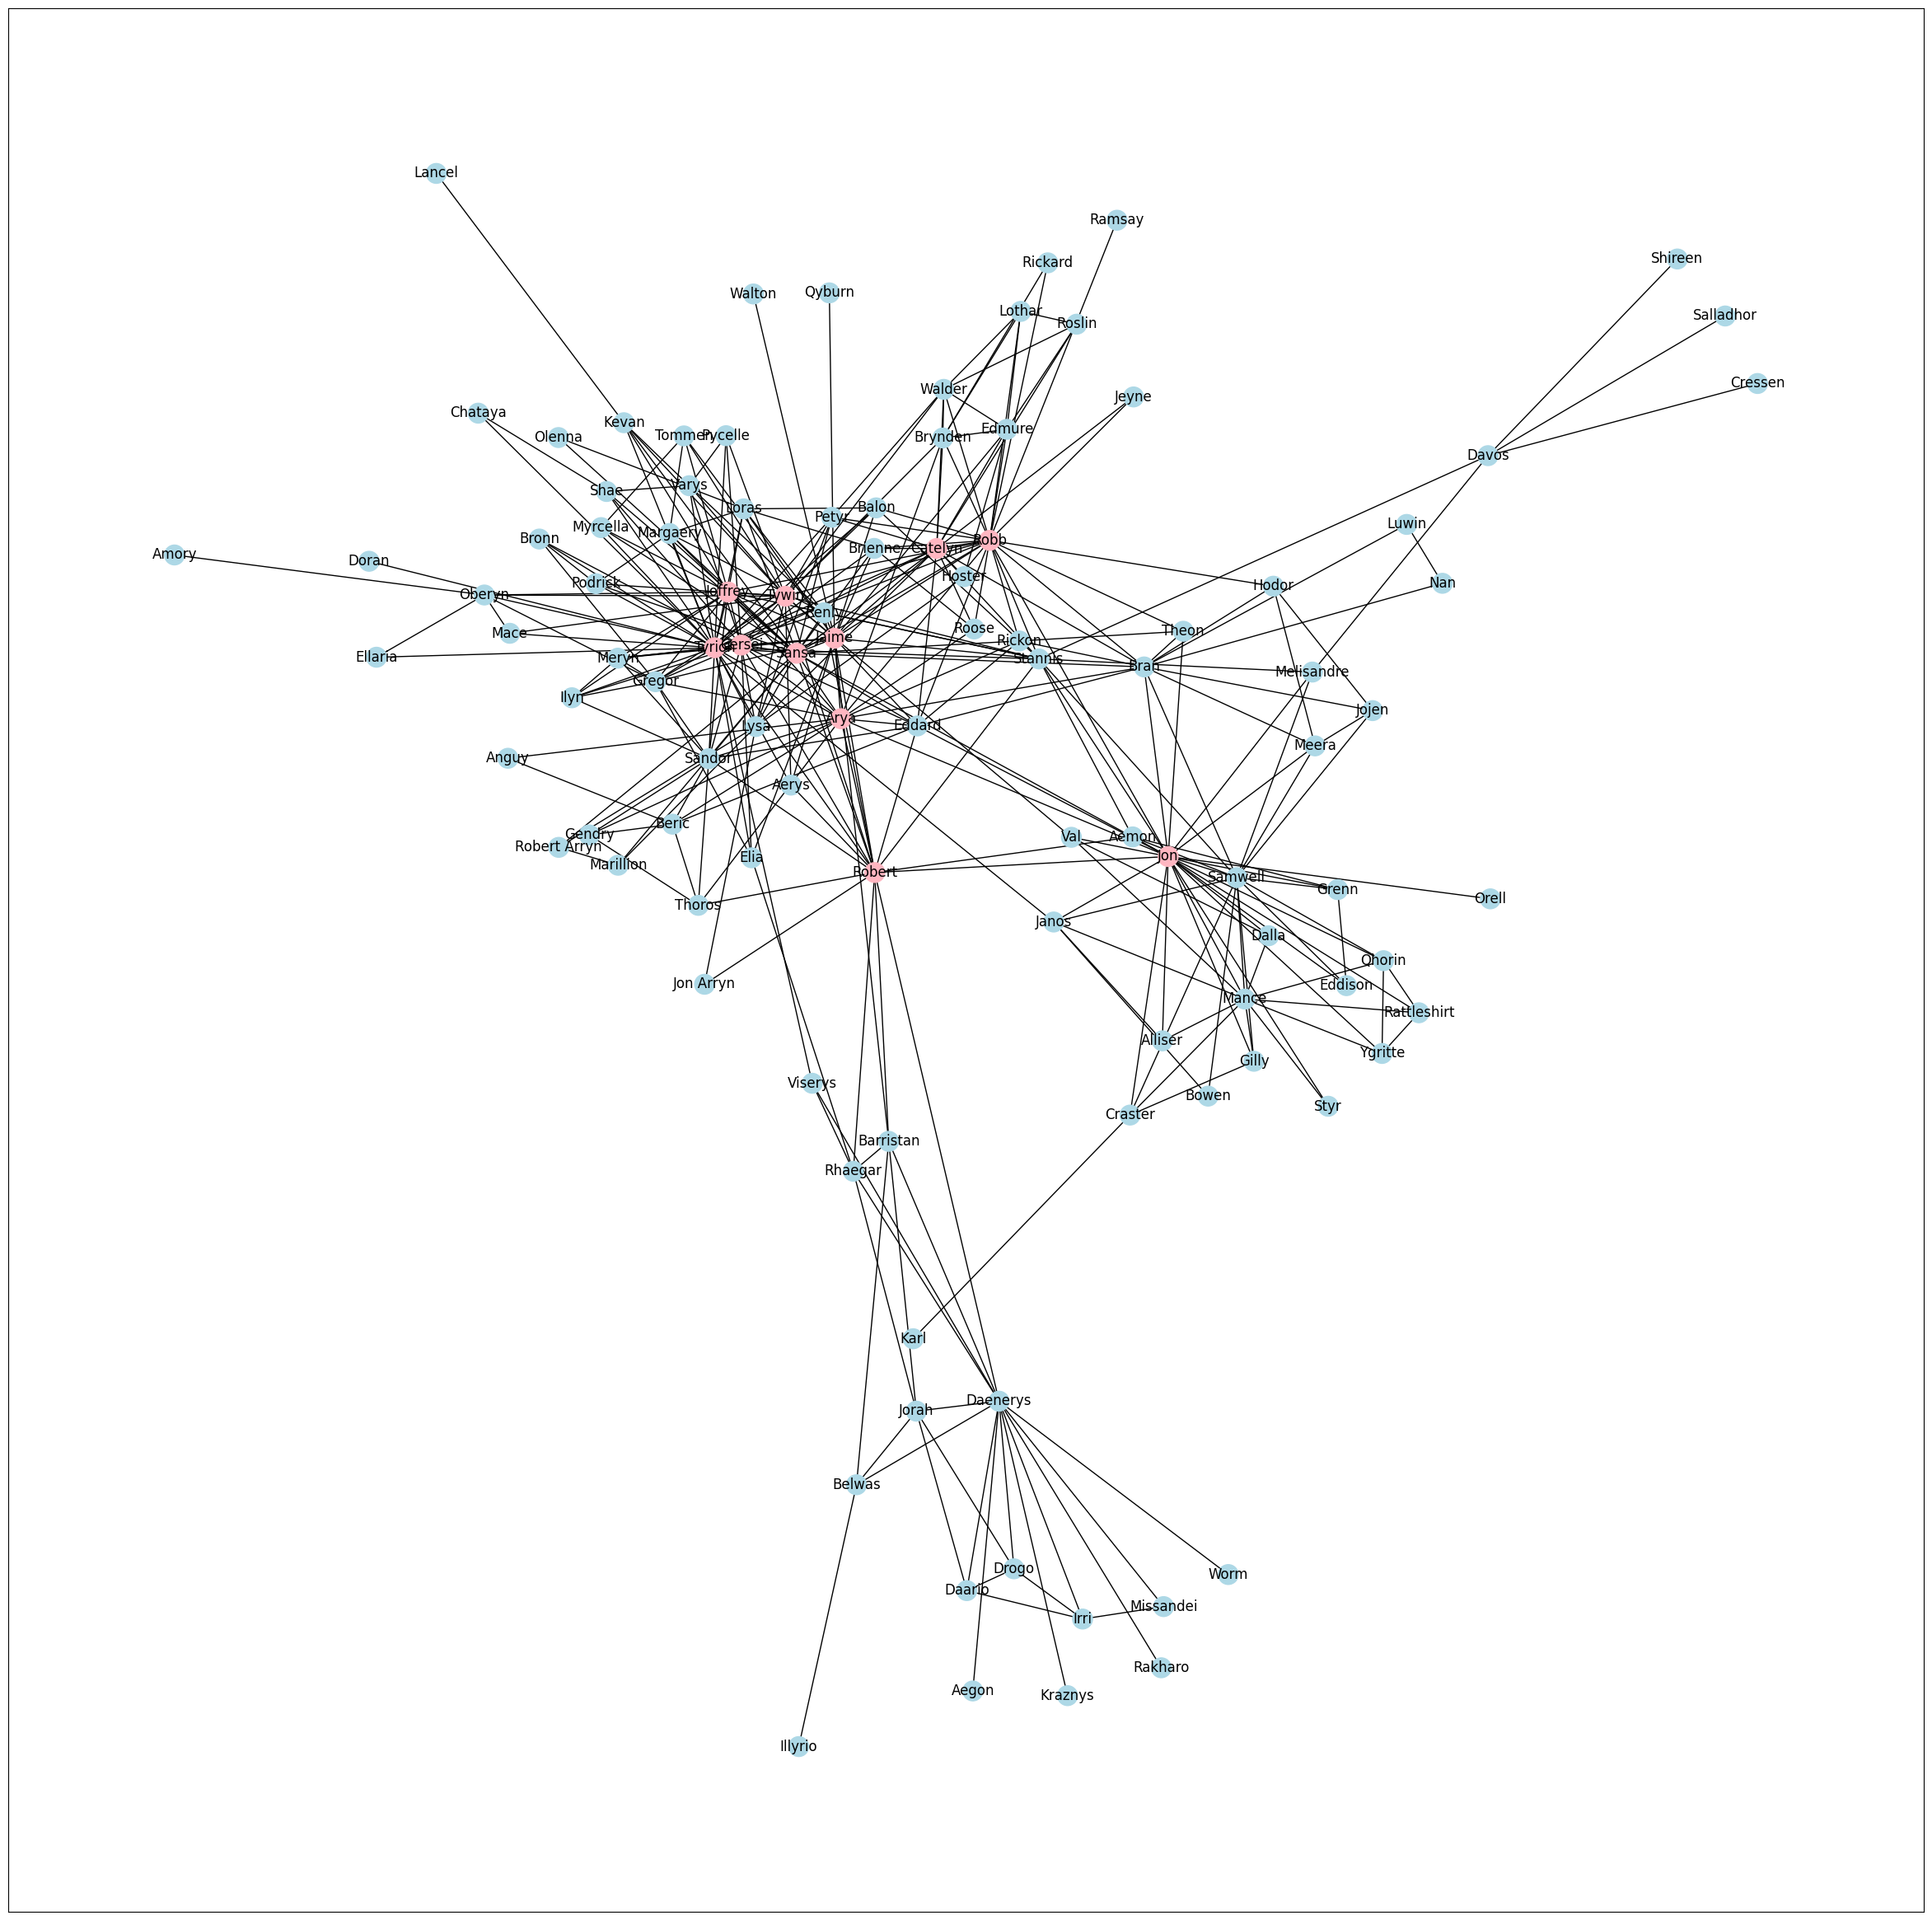

In [69]:
### Put your code for Question 2.3 here
import matplotlib.pyplot as plt

color1 = 'lightpink' 
color2 = 'lightblue'

all_degrees = dict(graph.degree())
high_degrees = [node for node, degree in all_degrees.items() if degree >= 18]
low_degrees = [node for node, degree in all_degrees.items() if degree < 18]

plt.figure(figsize = (30, 30))
nx.draw_networkx(graph, pos = nx.spring_layout(graph), node_color = [color1 if node in high_degrees else color2 for node in graph.nodes()], with_labels = True)
plt.show()

---

### For each part of Question 2.4, use a short amount of networkx code to find answer. Note that you must use the `Graph` object you created along with a networkx method to receive credit, and answers based on using the original csv file, the DataFrame, or the plot in Question 2.3 will not receive credit.

Note that your code doesn't need to format the answer in a complete sentence, but the output should not contain any extraneous information.

Also, if you couldn't create the `Graph` correctly, you can still receive credit on each part of Question 2.4 by writing code that would have given the correct answer if your `Graph` was correct.

&#9989; **Question 2.4.1 (1 point)** How many characters are in this dataset?

In [70]:
### Put your code for Question 2.4.1 here
num_char = len(graph.nodes())
num_char

107

&#9989; **Question 2.4.2 (1 point)** True or False?: The characters `Ilyn` and `Joffrey` coappear.

In [71]:
### Put your code for Question 2.4.2 here
'Joffrey' in graph.neighbors('Ilyn')

True

&#9989; **Question 2.4.3 (1 point)** How many characters coappear with `Daenerys`? 

In [75]:
### Put your code for Question 2.4.3 here
num_coappearances_daenerys = len(list(G.neighbors('Daenerys')))
num_coappearances_daenerys

14

&#9989; **Question 2.4.4 (1 point)** List all characters who coappear with `Rickon`. 

**Hint**: The `list()` method and the `all_neighbors()` method in `networkx` will be useful for answering this question.

In [46]:
### Put your code for Question 2.4.4 here
rickon_coappears = list(graph.neighbors('Rickon'))
rickon_coappears

['Arya', 'Bran', 'Eddard', 'Theon', 'Robb', 'Sansa']

We define the distance between two characters as the length of the shortest path between the nodes corresponding to the two characters (i.e. the number of edges in this path, which is one less than the number of nodes).

&#9989; **Question 2.4.5 (2 points)**:  What is the distance between `Drogo` and `Walton`?

**Hint**: See if you can use a search engine to find a `networkx` method that computes the length of the shortest path between two nodes.

In [49]:
### Put your code for Question 2.4.5 here
drogo_walton_dist = nx.shortest_path_length(graph, source = 'Drogo', target = 'Walton')
drogo_walton_dist

4

&#9989; **Question 2.4.6 (4 points)**: What is the **maximum distance** between a Game of Thrones character and `Robert`?

**Hint**: You may want to start by looping through the nodes in the `Graph` you created, computing the distance between that node and `Robert`, and then appending that distance to a list.

In [55]:
### Put your code for Question 2.4.6 here
robert_dists = [nx.shortest_path_length(graph, source = 'Robert', target = char) for char in graph.nodes()]
max_robert_dist = max(robert_dists)
max_robert_dist

3

&#9989; **Question 2.4.7 (4 points)**: Which Game of Thrones **character** is farthest from `Lancel` (i.e. which character has the greatest distance to `Lancel`)? 

**Note**: You may assume there is a unique farthest character (i.e. no ties for the greatest distance).

**Hint**: Similarly to Question 2.4.7, you may want to start by looping through the nodes in the `Graph` you created, computing the distance between that node and `Lancel`, and then appending that distance to a list.

In [65]:
### Put your code for Question 2.4.7 here
lancel_dists = {character: nx.shortest_path_length(graph, source = 'Lancel', target = character) for character in graph.nodes()}
lancel_furthest = max(lancel_dists, key = lancel_dists.get)
lancel_furthest

'Illyrio'

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 2**", and push the changes to GitHub.


If committing and/or pushing isn't working for you, write down the complete commands in this cell that would have committed your changes (with the commit message) and pushed them to GitHub.

---

<hr style="border:2px solid gray">

## Part 3: Regression on synthetic data (27 points)

In this part of the exam, we will generate synthetic data according to a known model. First, you will perform linear regression on the data and interperate the results. Next, you will perform polynomial regression and interperate the results. Finally, you will perform polynomial regression, but with a reduced model, and interperate the results.


To get started, run the cell below to generate two `numpy` arrays `x_data` and `y_data`.

In [ ]:
# DO NOT EDIT THIS CELL
# DO NOT EDIT THIS CELL
import numpy as np
import pandas as pd
np.random.seed(42)
x_data = np.random.uniform(-1,1,size=(101,))
y_data = np.sin(np.pi*x_data)+0.15*np.random.normal(size=(101,))
# DO NOT EDIT THIS CELL
# DO NOT EDIT THIS CELL

&#9989;  **Question 3.1 (1 point)**: Before you get too caried away with regression analysis, make a scatterplot of this data with `y_data` on the vertical axis and `x_data` on the horizontal axis. This will help you see what is going on.

In [ ]:
# Put your code for Question 3.1 here:

&#9989;  **Question 3.2 (2 points)**: Looking at the plot you made in Question 3.1, is a linear model appropriate for this data? Briefly justify your answer.

<font size=+3>&#9998;</font> **Do This - Erase the contents of this cell and put your answer here.**

&#9989;  **Question 3.3 (4 points)**: Regardless of your answer to Question 3.2, we will try linear regression anyway.

**Do This**: Using `OLS()` in `statsmodels`, fit a linear model of the form $\widehat{y} = Ax+B$ to the data. 

*Hint*: Don't forget the constant term. Also, you might want to have the original variable `x_data` handy for Question 3.5, so be careful not to overwrite it when using the `add_constant()` method.

In [ ]:
# Put your code for Question 3.3 here:

&#9989;  **Question 3.4 (2 points)**: Looking at the results summary, what is the equation of your best fit linear model? You may round the coefficents to a few decimal places when writing down your answer.

<font size=+3>&#9998;</font> **Do This - Erase the contents of this cell and put your answer here.**

&#9989;  **Question 3.5 (5 points)**: Now, we will use OLS to fit a degree-$6$ polynomial model to this data. If you get stuck, you may want to look at the Day-14 PCA. 

**Do the following**: 
* First, construct a `Pandas` `DataFrame` whose columns are the monomial features $1, x, x^2, x^3, x^4, x^5, x^6$. In other words, this `DataFrame` should have 7 columns. The 0th column has all 1's. The 1st column should have the values in `x_data`. The 2nd column should have the values in `x_data` raised to the 2nd power, ..., and the 6th column should have the values in `x_data` raised to the 6th power.
* Then, perform OLS using `statsmodels`, and display the results summary.

In [ ]:
# Put your code for Question 3.5 here:

&#9989;  **Question 3.6 (2 points)**: Looking at just the results summaries in Question 3.5 and Question 3.3, is our degree-$6$ polynomial significantly better than our linear model? **Justify your answer.**

<font size=+3>&#9998;</font> **Do This - Erase the contents of this cell and put your answer here.**

&#9989;  **Question 3.7 (2 points)**: Looking at just the results summary in Question 3.5 (and not at how the synthetic data was generated), which of the monomial features $1, x, x^2, x^3, x^4, x^5, x^6$ are statistically significant and which are not statistically significant? **Again, justify your answer.**

<font size=+3>&#9998;</font> **Do This - Erase the contents of this cell and put your answer here.**

&#9989;  **Question 3.8 (2 points)**: In Question 3.7, you should have observed a pattern to which monomial features were statistically significant and which were not. The data points $(x_i,y_i)$ were generated according to the sinusoidal model $y_i = \sin(\pi x_i) + \text{noise}_i$. With this in mind, give an explaination for this pattern.

*Hint*: Think about what kind of symmetry $y = \sin(\pi x)$ has about $x = 0$ as well as what kind of symmetry each of the monomials $1, x, x^2, x^3, x^4, x^5, x^6$ has about $x = 0$.

<font size=+3>&#9998;</font> **Do This - Erase the contents of this cell and put your answer here.**

&#9989;  **Question 3.9 (5 points)**: Now, use OLS to fit a polynomial model using only the monomial features which you identified as being statistically significant. Again, print out the results summary.

In [ ]:
# Put your code for Question 3.9 here:

&#9989;  **Question 3.10 (2 points)**: How well did your reduced polynomial model (from Question 3.9) fit the data compared to the full degree-$6$ polynomial model (from Question 3.5)? Give some quantitative justification for this answer.

<font size=+3>&#9998;</font> **Do This - Erase the contents of this cell and put your answer here.**

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 3**", and push the changes to GitHub.


If committing and/or pushing isn't working for you, write down the complete commands in this cell that would have committed your changes (with the commit message) and pushed them to GitHub.

---

<hr style="border:2px solid gray">

## Part 4: Support vector machine (SVM) classification (29 points)

In this part of the exam, we will use a support vector machine (SVM) classifier to identify seed varieties based on various seed measurements. We will be using the UC Irvine Machine Learning Repository Seeds Dataset. More info about this dataset can be found here https://archive.ics.uci.edu/dataset/236/seeds. 

To get started, download the `Seeds.csv` file from the link below (or D2L) and place it in the same directory as your notebook. 

`https://raw.githubusercontent.com/skarnik1337/cmse202sec002s24final/main/Seeds.csv`

&#9989; **Question 4.1 (2 points)**: Read in the `Seeds.csv` dataset into a `Pandas` `DataFrame` and display the first and last few rows. 

In [ ]:
### Put your code for Question 4.1 here

&#9989; **Question 4.2 (2 points)**: Our goal is to classify the `Variety` of the seed given the features `Area`, `Perimeter`, `Compactness`, `Kernel Length`, `Kernel Width`, `Asymmerty` and `Groove Length`. Create a variable with all of the columns of the `DataFrame` except for `Variety`,  and another variable with just the `Variety` column of the `DataFrame`.

In [ ]:
### Put your code for Question 4.2 here

Now that the data is properly loaded into Python, we need to perform a **train-test-split** so that we can build our SVM classifier and test it.

&#9989; **Question 4.3 (4 points)**: Use the `train_test_split()` method from `sklearn.model_selection` like we did in class. Use a `train_size` of `0.75` and `random_state` of `161803`. You should now have training features, testing features, training labels, and testing labels. Finally, **print the shape of your training features, training labels, testing features, and testing labels** to verify that your train-test-split did what it was supposed to.

In [ ]:
### Put your code for Question 4.2 here

&#9989; **Question 4.4 (6 points)**: Fit an SVM classifier (using the `sklearn` `SVC` class) to the dataset. Use a `linear` kernel and set the hyper-parameter to be `C=0.001.` Then **fit the SVM using your training set** and use the resulting SVM to **predict the labels for the testing set** so you get predicted labels for the testing set. Finally, **print the fit statistics** using the `confusion_matrix()` and `classification_report()` methods.

In [ ]:
### Put your code for Question 4.4 here

&#9989; **Question 4.5 (2 points)**: Create a second SVM classifier and test it by repeating your work from Question 4.4, but this time set the hyper-parameter to be `C=100.` Again, **print the fit statistics** using the `confusion_matrix()` and `classification_report()` methods.

In [ ]:
### Put your code for Question 4.5 here

&#9989; **Question 4.6 (6 points)**: Interpret the outputs of your classification reports and the confusion matrices by answering these questions (provide at least a couple sentences each for full credit): 

* Of the 53 seeds in the testing set, how many were misclassified by the first SVM (`C = 0.001`)? How many were misclassified by the second SVM (`C = 100`)? **Explain how you figured out the number of misclassifications**. 

* For just the first SVM (`C = 0.001`) what were the **precision** and **recall** for just the `Canadian` class? Explain in complete sentences what both of these numbers mean **in the context of this dataset**.

<font size=+3>&#9998;</font> **Do This - Erase the contents of this cell an put your answer here.**

---

&#9989; **Question 4.7 (1 point)**: Suppose we wanted to try fitting a Support Vector Classifier for multiple choices of the kernel function and multiple choices for the values of the hyperparameter(s) (instead of just using a `linear` kernel with one value of `C`). We could write code with nested for loops to repeat the procedure with every combination of kernel function and hyperparameter value(s) we wanted to try. Name a method built into sklearn that will do this automatically. (We used this on an in-class assignment).

<font size=+3>&#9998;</font> **Do This - Erase the contents of this cell an put your answer here.**

&#9989; **Question 4.8 (3 points)**: Both of the images below show the same two-dimensional dataset with two classes (solid blue squares and unfilled red circles) along with the decision boundary of a linear classifier. One classifier was generated via the Perceptron Learning Algorithm, and the other used a Support Vector Classifier. Which one is which? **Justify your answer!**

Classifier A          | | Classifier B
:-------------------------:|:---:|:-------------------------:
![](https://i.ibb.co/R2BBsDC/Datapoints1-A.png)  | |  ![](https://i.ibb.co/mb9vcq4/Datapoints1-B.png)

<font size=+3>&#9998;</font> **Do This - Erase the contents of this cell an put your answer here.**

&#9989; **Question 4.9 (3 points)**: Both of the images below show the same two-dimensional dataset with two classes (solid blue squares and unfilled red circles) along with the decision boundary of a linear Support Vector Classifier. One used the hyperparameter `C = 0.1`, and the other used the hyperparameter `C = 1000`. Which one is which? **Justify your answer!**

Classifier X          | | Classifier Y
:-------------------------:|:---:|:-------------------------:
![](https://i.ibb.co/7pPCRwh/Datapoints2-A.png)  | |  ![](https://i.ibb.co/LSMBXzd/Datapoints2-B.png)

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 4**", and push the changes to GitHub.


If committing and/or pushing isn't working for you, write down the complete commands in this cell that would have committed your changes (with the commit message) and pushed them to GitHub.

---

## You're done! Congrats on finishing your CMSE 202 Final!

Make sure all of your changes to your repository are committed and pushed to GitHub (or that you wrote down the commands that would have done that after each part). Also upload a copy of this notebook to the dropbox on D2L in case something went wrong with your repository or if you couldn't get the repository to work.